### Playing with Marvin's time series of Nihao galaxy properties

What I understood from Marvin's data (correct me if I am wrong) is that I have the stellar mass of a galaxy as a function of time, the mass of its central black hole, and its color. For now I am ignoring color and focusing just on the first two quantities. I will try to learn differential equations describing their evolution over time.

From many points of view this is unlikely to work as stated, for one thing it's impossible to learn whether a merger is coming, the gas mass is being ignored, etc...

##### ...yet surprisingly a set of differential equations that describes these two quantities over time is learned, and it performs pretty well on a good fraction of the galaxies; moreover the form of these equations is the same over the whole sample, without this constraint being enforced directly (each galaxy is learned separately). The coefficients are also often similar.

### Let's define a few functions and do some houskeeping first

In [121]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pysindy as ps
from sklearn.linear_model import Lasso
from numpy.linalg import norm

%matplotlib inline

f = open('data_tgreen.json', 'r')
data_all = json.load(f)
f.close()

##### plot quantities versus time
all_galaxies = data_all[0].keys()

def nicePlot(x,y):
    plt.clf()
    plt.plot(x,y)
    plt.show()
    
def readThisGalaxy(k):
    galname = list(all_galaxies)[k]
    print("--------- " + galname +  " ------------------------------------")   

    N = data_all[0][galname]['n_steps']
    time = np.flip(np.array([data_all[i][galname]['time'] for i in range(N)]))
    mstar = np.flip(np.array([data_all[i][galname]['mstar'] for i in range(N)]))
    mbh_c = np.flip(np.array([data_all[i][galname]['mbh_c'] for i in range(N)]))
    color = np.flip(np.array([data_all[i][galname]['u-r'] for i in range(N)]))
    return(time, mstar, mbh_c, color)
    
def plotThisGalaxy(k, useLogs=True):
    time, mstar, mbh_c, color = readThisGalaxy(k)
    def transform(x): return(x)
    if(useLogs): transform = np.log10
    nicePlot(time, transform(mstar))
    nicePlot(time, transform(mbh_c))
    nicePlot(time, color)

### Let's run pysindy on Marvin's data
##### For now let's just use first order equations. Pysindy is trying to guess an equation in the form:
- m_star' = P( m_bh, m_star )
- m_bh' = Q( m_bh, m_star )

##### where P(x,y) and Q(x,y) are polynomials. For now I am limiting this to second order and without mixed terms. But I experimented changing these settings and it's easy to get good fits in many different ways.

### In the plots below the black points represent the data from Marvin and the green points the solution to the learned differential equations from initial conditions corresponding to the first data point from Marvin's data

 
--------- g7.55e11 ------------------------------------
m_*' = 0.873 m_* + -0.092 m_*^2 + 0.014 m_bh^2
m_bh' = 0.010 m_*^2 + -0.019 m_bh^2


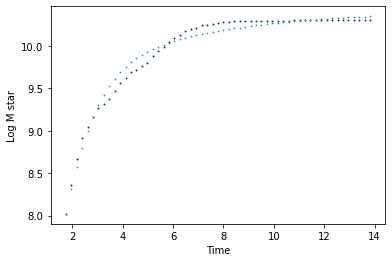

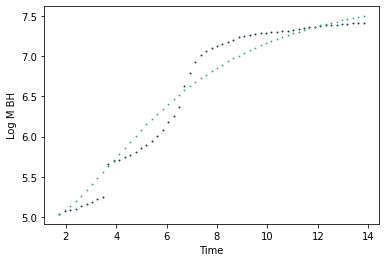

-------------------------------------------------------
 
 
--------- g8.26e11 ------------------------------------
m_*' = 0.656 m_* + -0.059 m_*^2 + -0.007 m_bh^2
m_bh' = 0.013 m_*^2 + -0.023 m_bh^2


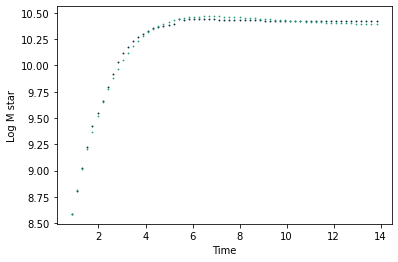

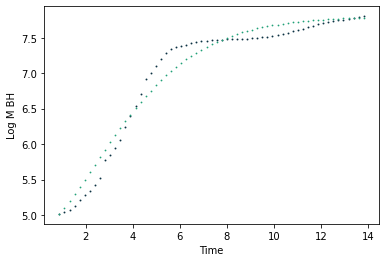

-------------------------------------------------------
 
 
--------- g1.12e12 ------------------------------------
m_*' = 0.473 m_* + -0.039 m_*^2 + -0.012 m_bh^2
m_bh' = 0.014 m_*^2 + -0.024 m_bh^2


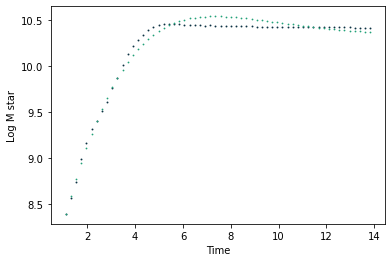

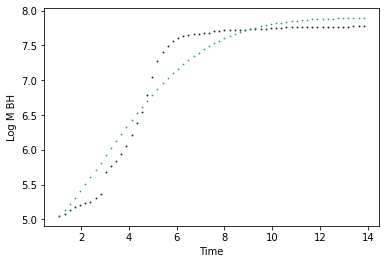

-------------------------------------------------------
 
 
--------- g1.92e12 ------------------------------------
m_*' = 1.505 m_* + -0.137 m_*^2 + -0.007 m_bh^2
m_bh' = 0.023 m_*^2 + -0.037 m_bh^2


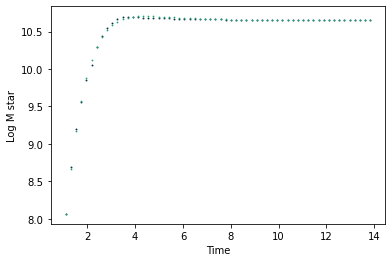

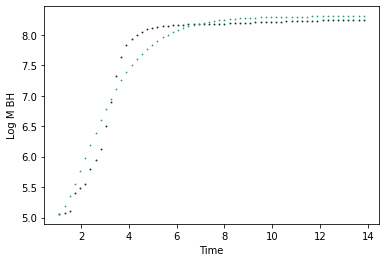

-------------------------------------------------------
 
 
--------- g2.79e12 ------------------------------------
m_*' = 1.076 m_* + -0.101 m_*^2 + 0.005 m_bh^2
m_bh' = 0.016 m_*^2 + -0.027 m_bh^2


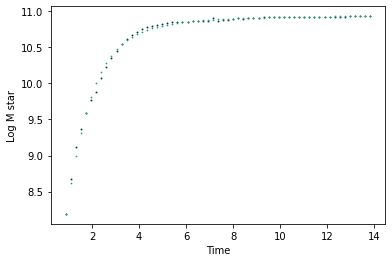

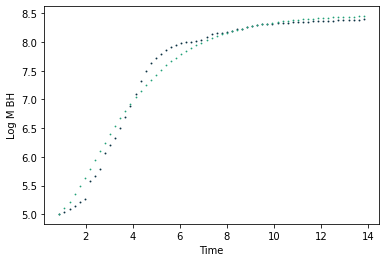

-------------------------------------------------------
 
 
--------- g1.26e12 ------------------------------------
m_*' = 0.392 m_* + -0.039 m_*^2 + 0.002 m_bh^2
m_bh' = 0.005 m_*^2 + -0.008 m_bh^2


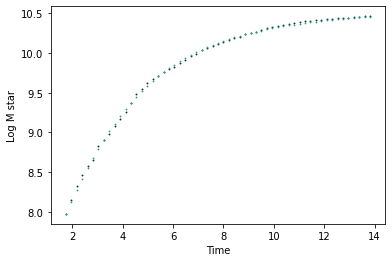

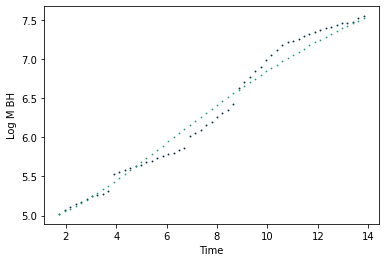

-------------------------------------------------------
 
 
--------- g1.27e12 ------------------------------------
m_*' = 0.796 m_* + -0.078 m_*^2 + 0.003 m_bh^2
m_bh' = 0.011 m_*^2 + -0.018 m_bh^2


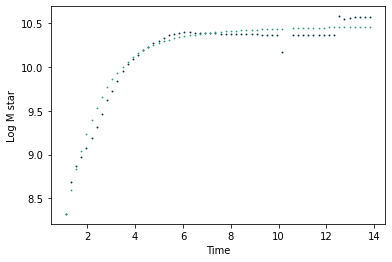

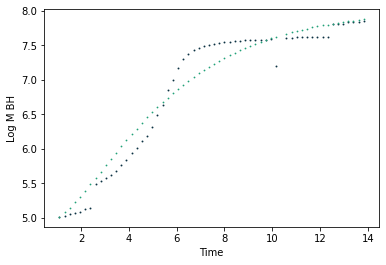

-------------------------------------------------------
 
 
--------- g1.55e12 ------------------------------------
m_*' = 1.611 m_* + -0.162 m_*^2 + 0.020 m_bh^2
m_bh' = 0.007 m_*^2 + -0.012 m_bh^2


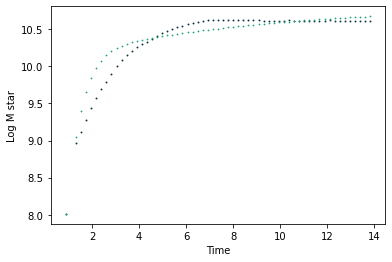

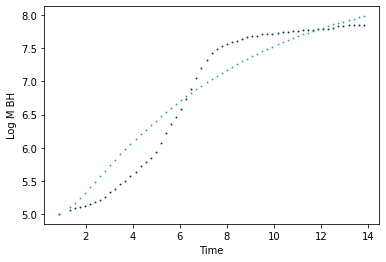

-------------------------------------------------------
 
 
--------- g1.62e12 ------------------------------------
m_*' = 0.559 m_* + -0.059 m_*^2 + 0.008 m_bh^2
m_bh' = 0.011 m_*^2 + -0.018 m_bh^2


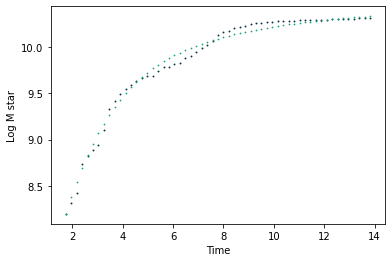

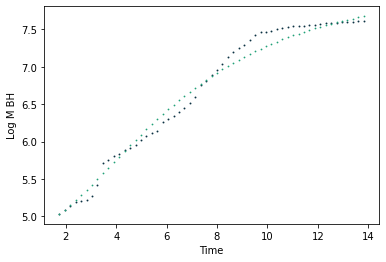

-------------------------------------------------------
 
 
--------- g2.37e12 ------------------------------------
m_*' = 0.708 m_* + -0.063 m_*^2 + -0.005 m_bh^2
m_bh' = 0.014 m_*^2 + -0.022 m_bh^2


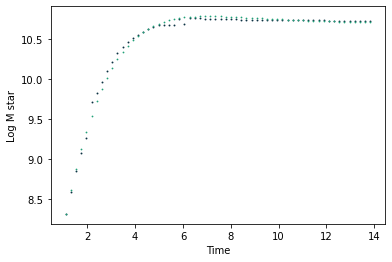

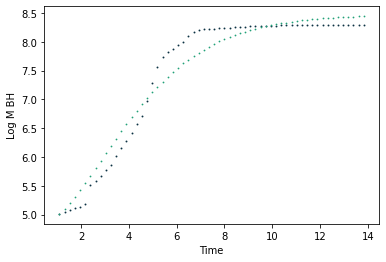

-------------------------------------------------------
 
 
--------- g2.71e12 ------------------------------------
m_*' = 0.023 m_*^2 + -0.039 m_bh^2
m_bh' = -0.909 m_* + 0.131 m_*^2 + -0.075 m_bh^2


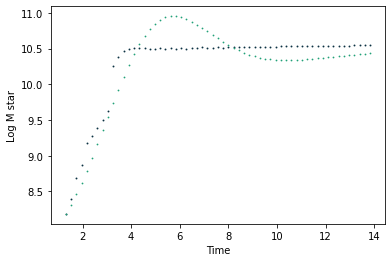

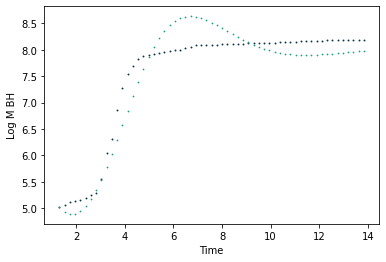

-------------------------------------------------------
 
 
--------- g3.74e12 ------------------------------------
m_*' = 0.012 m_*^2 + -0.020 m_bh^2
m_bh' = 0.029 m_*^2 + -0.047 m_bh^2


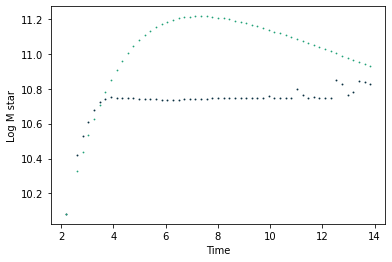

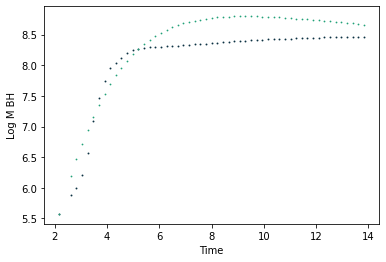

-------------------------------------------------------
 
 
--------- g4.41e12 ------------------------------------
m_*' = 0.879 m_* + -0.080 m_*^2 + -0.001 m_bh^2
m_bh' = -0.606 m_* + 0.073 m_*^2 + -0.025 m_bh^2


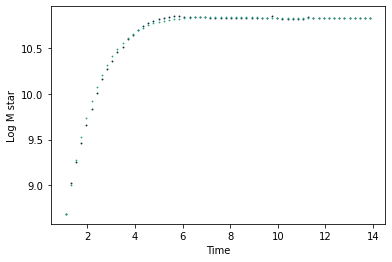

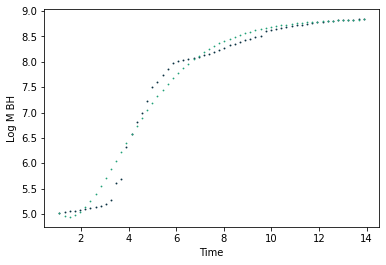

-------------------------------------------------------
 
 
--------- g4.55e12 ------------------------------------
m_*' = 0.005 m_*^2 + -0.009 m_bh^2
m_bh' = 0.023 m_*^2 + -0.036 m_bh^2


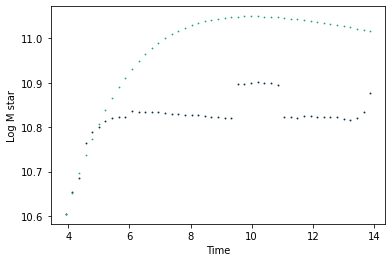

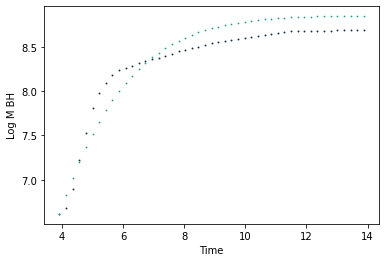

-------------------------------------------------------
 
 
--------- g4.81e12 ------------------------------------
m_*' = 0.205 m_* + -0.030 m_bh^2
m_bh' = -1.031 m_* + 0.136 m_*^2 + -0.066 m_bh^2


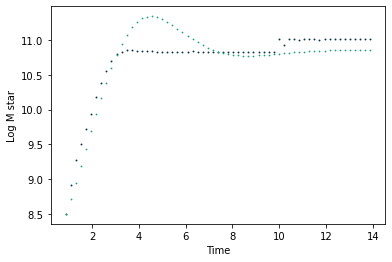

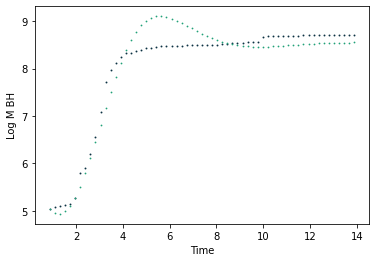

-------------------------------------------------------
 
 
--------- g4.84e12 ------------------------------------
m_*' = 0.020 m_*^2 + -0.032 m_bh^2
m_bh' = 0.020 m_*^2 + -0.031 m_bh^2


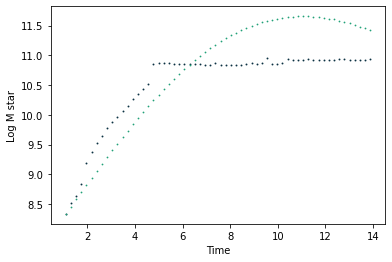

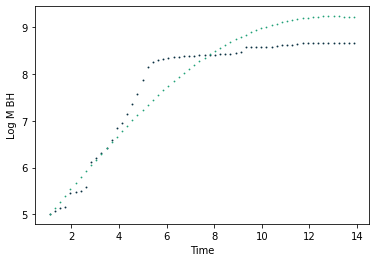

-------------------------------------------------------
 
 
--------- g5.22e12 ------------------------------------
m_*' = 1.354 m_* + -0.125 m_*^2 + -0.001 m_bh^2
m_bh' = 0.037 m_*^2 + -0.058 m_bh^2


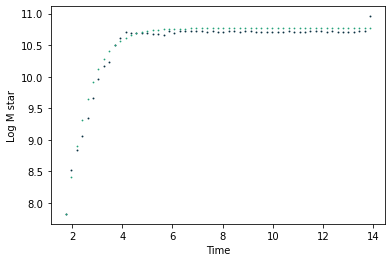

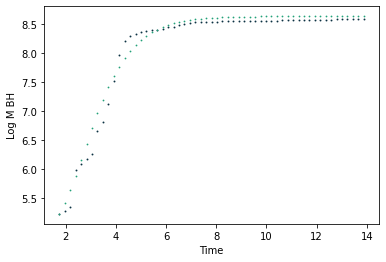

-------------------------------------------------------
 
 
--------- g5.41e12 ------------------------------------
m_*' = 0.186 m_* + -0.026 m_bh^2
m_bh' = -0.503 m_* + 0.075 m_*^2 + -0.045 m_bh^2


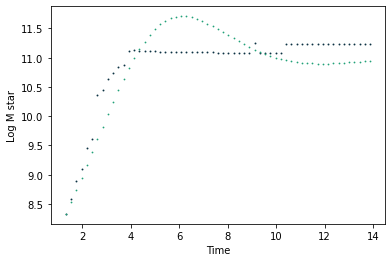

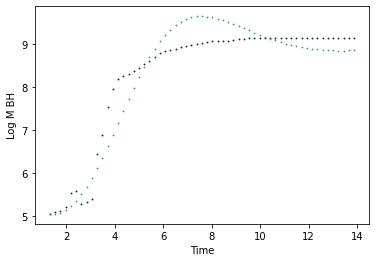

-------------------------------------------------------
 
 
--------- g5.53e12 ------------------------------------
m_*' = 0.996 m_* + -0.087 m_*^2 + -0.008 m_bh^2
m_bh' = -0.654 m_* + 0.086 m_*^2 + -0.039 m_bh^2


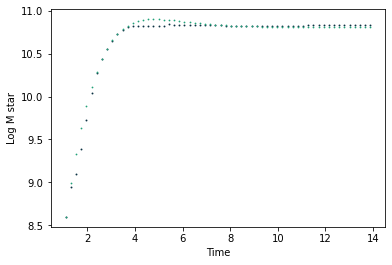

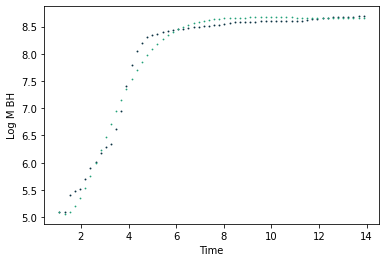

-------------------------------------------------------
 
 
--------- g6.53e12 ------------------------------------
m_*' = 1.110 m_* + -0.098 m_*^2 + -0.004 m_bh^2
m_bh' = -0.431 m_* + 0.058 m_*^2 + -0.030 m_bh^2


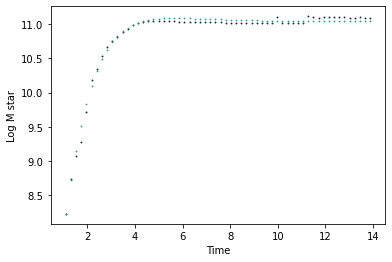

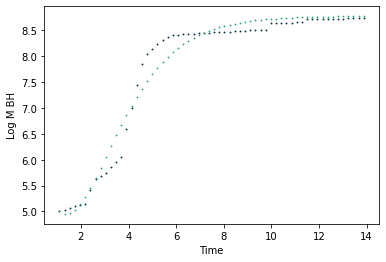

-------------------------------------------------------
 
 
--------- g6.70e12 ------------------------------------
m_*' = 2.593 m_* + -0.241 m_*^2 + 0.031 m_bh^2
m_bh' = 0.012 m_*^2 + -0.020 m_bh^2


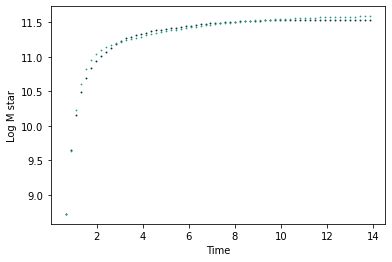

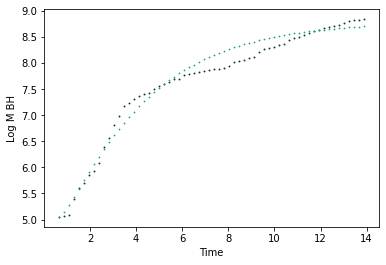

-------------------------------------------------------
 
 
--------- g7.50e12 ------------------------------------
m_*' = 1.712 m_* + -0.161 m_*^2 + 0.009 m_bh^2
m_bh' = -0.648 m_* + 0.088 m_*^2 + -0.041 m_bh^2


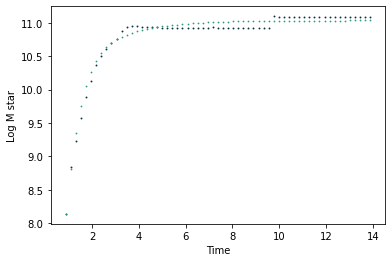

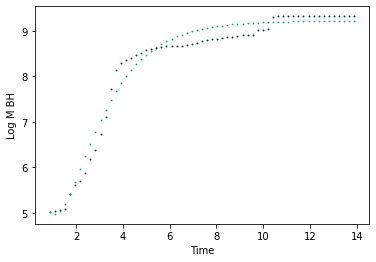

-------------------------------------------------------
 
 
--------- g7.55e12 ------------------------------------
m_*' = 0.111 m_* + 0.004 m_*^2 + -0.021 m_bh^2
m_bh' = 0.150 m_* + 0.006 m_*^2 + -0.029 m_bh^2


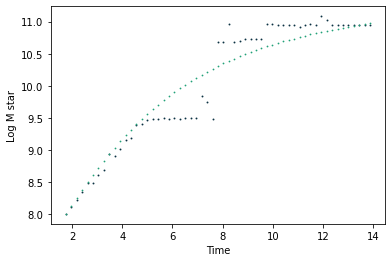

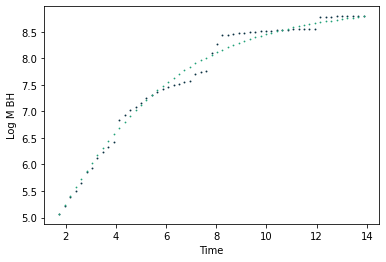

-------------------------------------------------------
 
 
--------- g7.71e12 ------------------------------------
m_*' = 0.974 m_* + -0.087 m_*^2
m_bh' = -0.551 m_* + 0.086 m_*^2 + -0.056 m_bh^2


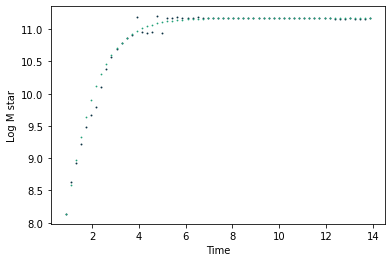

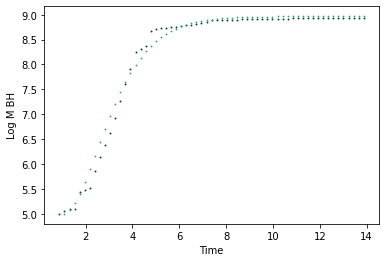

-------------------------------------------------------
 
 
--------- g7.92e12 ------------------------------------
m_*' = 1.578 m_* + -0.144 m_*^2 + 0.013 m_bh^2
m_bh' = -0.459 m_* + 0.052 m_*^2 + -0.018 m_bh^2


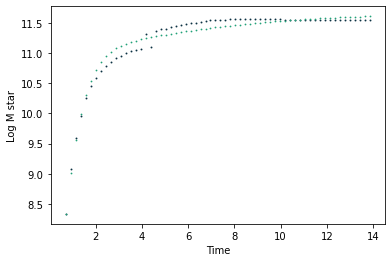

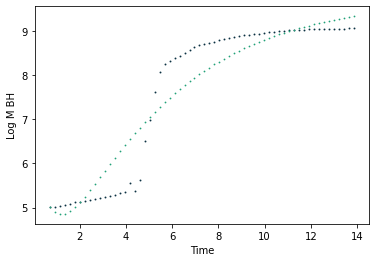

-------------------------------------------------------
 
 
--------- g8.08e12 ------------------------------------
m_*' = 2.575 m_* + -0.235 m_*^2 + 0.009 m_bh^2
m_bh' = -0.891 m_* + 0.102 m_*^2 + -0.035 m_bh^2


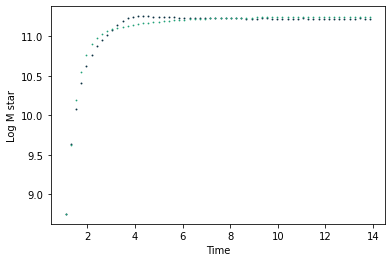

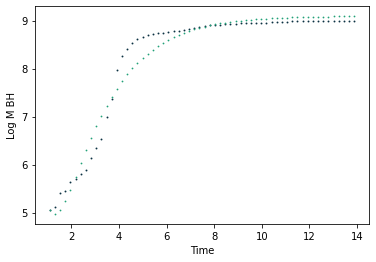

-------------------------------------------------------
 
 
--------- g8.45e12 ------------------------------------
m_*' = 0.010 m_*^2 + -0.016 m_bh^2
m_bh' = -0.756 m_* + 0.091 m_*^2 + -0.036 m_bh^2


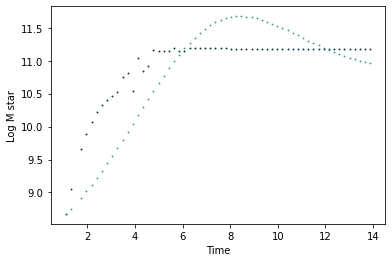

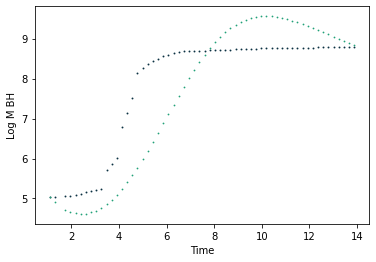

-------------------------------------------------------
 
 
--------- g8.94e12 ------------------------------------
m_*' = 1.001 m_* + -0.101 m_*^2 + 0.019 m_bh^2
m_bh' = 0.019 m_*^2 + -0.028 m_bh^2


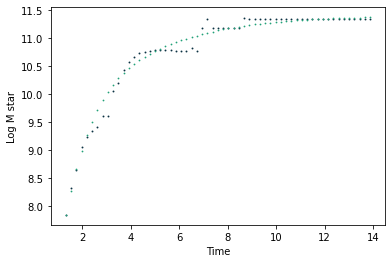

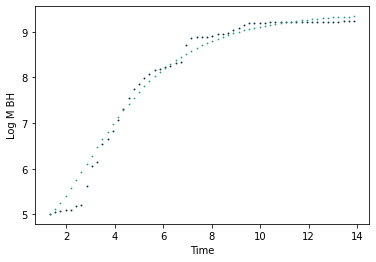

-------------------------------------------------------
 
 
--------- g9.61e12 ------------------------------------
m_*' = 0.024 m_*^2 + -0.037 m_bh^2
m_bh' = -0.326 m_* + 0.069 m_*^2 + -0.061 m_bh^2


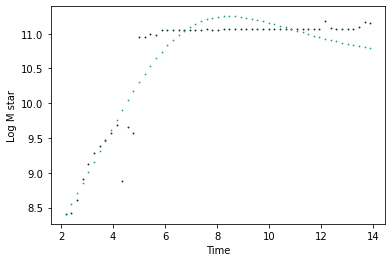

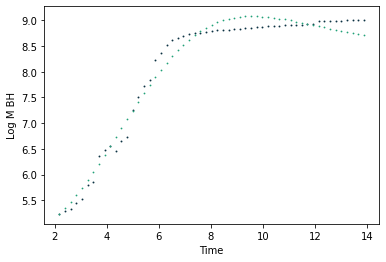

-------------------------------------------------------
 
 
--------- g1.05e13 ------------------------------------
m_*' = 0.179 m_* + -0.025 m_bh^2
m_bh' = -1.253 m_* + 0.154 m_*^2 + -0.064 m_bh^2


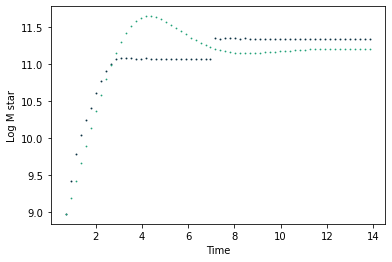

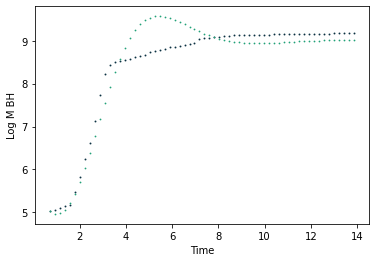

-------------------------------------------------------
 
 
--------- g1.14e13 ------------------------------------
m_*' = 0.959 m_* + -0.085 m_*^2
m_bh' = 0.025 m_*^2 + -0.037 m_bh^2


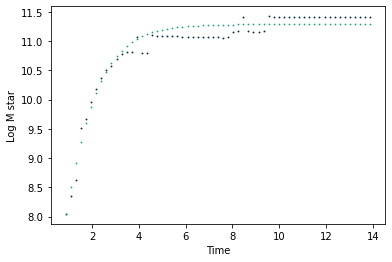

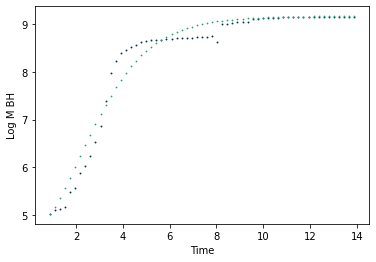

-------------------------------------------------------
 
 
--------- g1.17e13 ------------------------------------
m_*' = 1.717 m_* + -0.164 m_*^2 + 0.020 m_bh^2
m_bh' = 0.016 m_*^2 + -0.025 m_bh^2


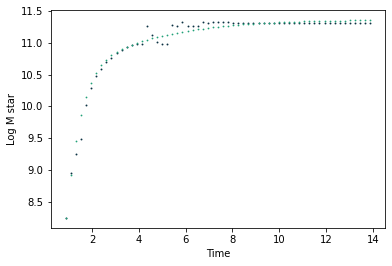

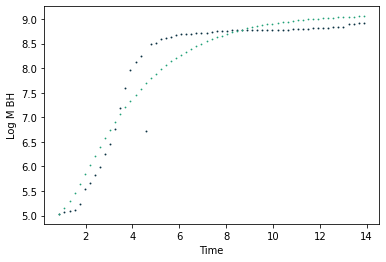

-------------------------------------------------------
 
 
--------- g1.25e13 ------------------------------------
m_*' = 0.177 m_* + -0.025 m_bh^2
m_bh' = 0.021 m_*^2 + -0.030 m_bh^2


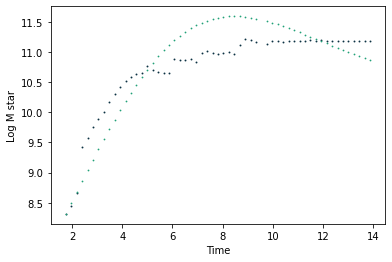

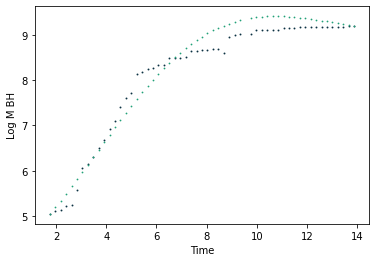

-------------------------------------------------------
 
 
--------- g1.33e13 ------------------------------------
m_*' = 0.000
m_bh' = 0.043 m_*^2 + -0.067 m_bh^2


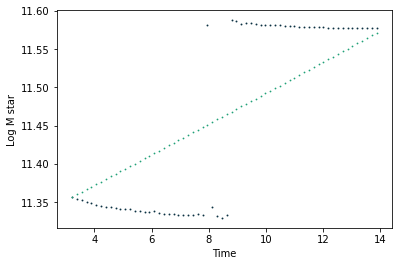

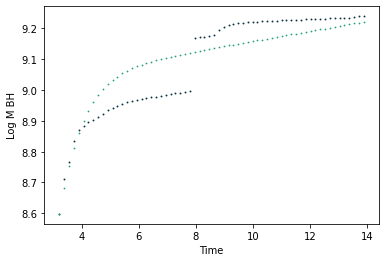

-------------------------------------------------------
 
 
--------- g1.44e13 ------------------------------------
m_*' = 2.894 m_* + -0.269 m_*^2 + 0.046 m_bh^2
m_bh' = 0.017 m_*^2 + -0.031 m_bh^2


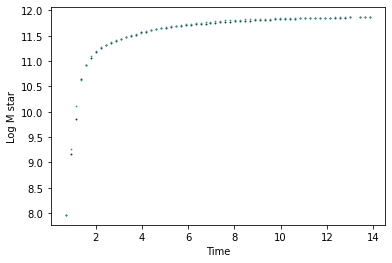

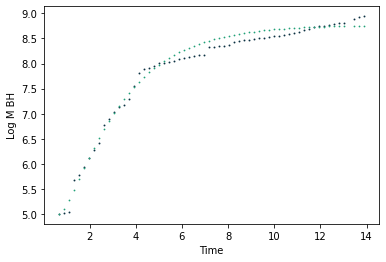

-------------------------------------------------------
 
 
--------- g1.54e13 ------------------------------------
m_*' = 0.696 m_* + -0.054 m_*^2 + -0.013 m_bh^2
m_bh' = -0.357 m_* + 0.065 m_*^2 + -0.051 m_bh^2


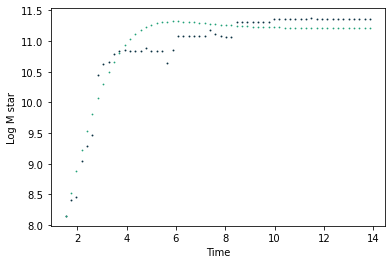

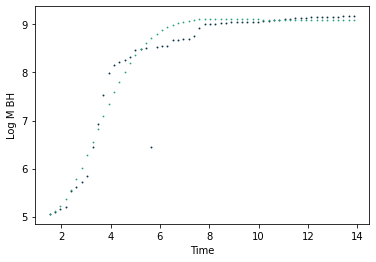

-------------------------------------------------------
 
 
--------- g1.57e13 ------------------------------------
m_*' = 0.028 m_*^2 + -0.046 m_bh^2
m_bh' = -0.672 m_* + 0.105 m_*^2 + -0.072 m_bh^2


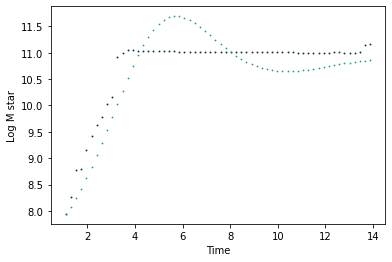

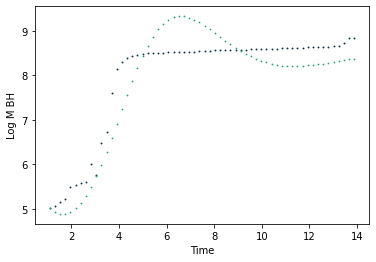

-------------------------------------------------------
 
 
--------- g1.63e13 ------------------------------------
m_*' = 1.167 m_* + -0.110 m_*^2 + 0.012 m_bh^2
m_bh' = 0.004 m_*^2 + -0.004 m_bh^2


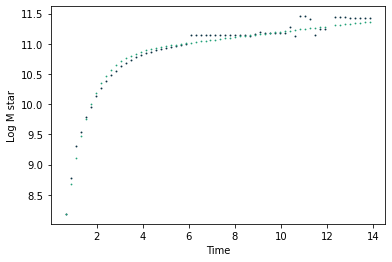

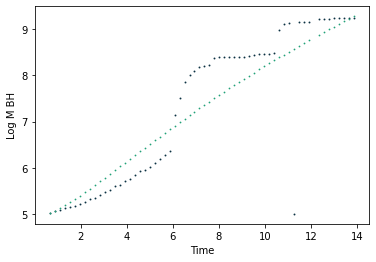

-------------------------------------------------------
 
 
--------- g1.87e13 ------------------------------------
m_*' = 1.194 m_* + -0.115 m_*^2 + 0.016 m_bh^2
m_bh' = 0.019 m_*^2 + -0.028 m_bh^2


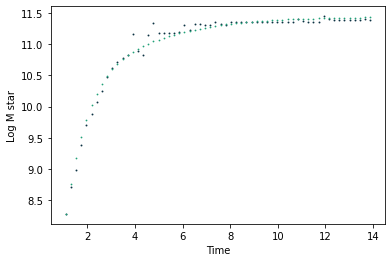

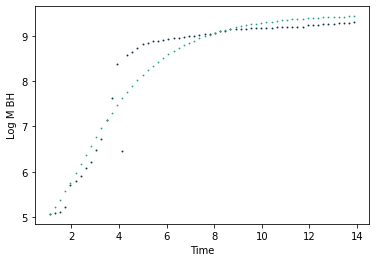

-------------------------------------------------------
 
 
--------- g2.02e13 ------------------------------------
m_*' = 1.916 m_* + -0.176 m_*^2 + 0.015 m_bh^2
m_bh' = -1.459 m_* + 0.154 m_*^2 + -0.041 m_bh^2


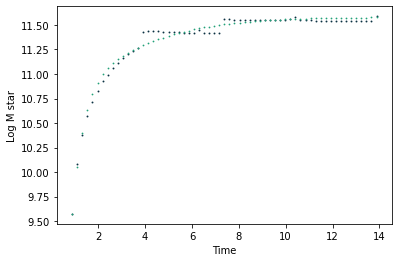

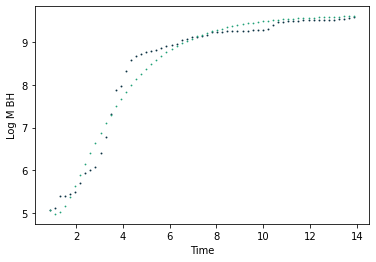

-------------------------------------------------------
 
 
--------- g2.07e13 ------------------------------------
m_*' = 0.751 m_* + -0.068 m_*^2 + 0.004 m_bh^2
m_bh' = 0.021 m_*^2 + -0.031 m_bh^2


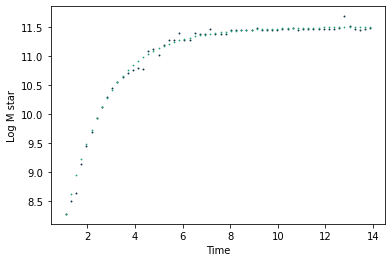

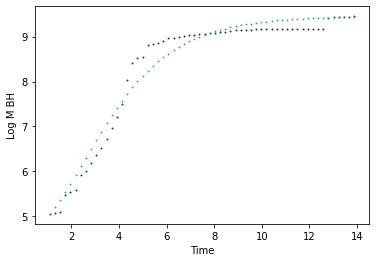

-------------------------------------------------------
 
 
--------- g2.11e13 ------------------------------------
m_*' = 0.991 m_* + -0.094 m_*^2 + 0.010 m_bh^2
m_bh' = 0.312 m_* + -0.018 m_*^2 + -0.012 m_bh^2


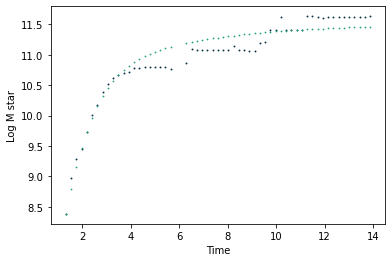

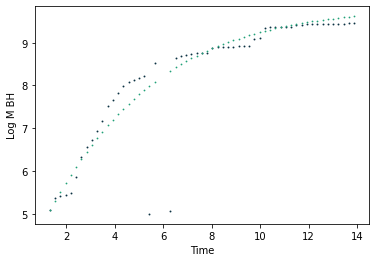

-------------------------------------------------------
 
 
--------- g2.20e13 ------------------------------------
m_*' = -0.025 m_*^2 + 0.037 m_bh^2
m_bh' = 0.018 m_*^2 + -0.026 m_bh^2


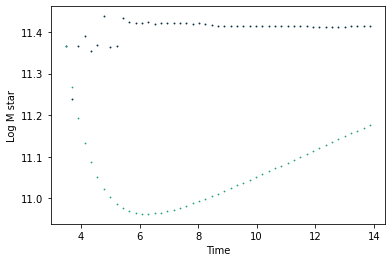

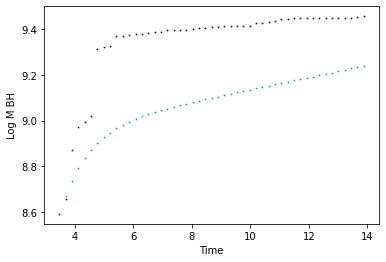

-------------------------------------------------------
 
 
--------- g2.37e13 ------------------------------------
m_*' = 0.771 m_* + -0.064 m_*^2 + -0.005 m_bh^2
m_bh' = -1.512 m_* + 0.188 m_*^2 + -0.082 m_bh^2


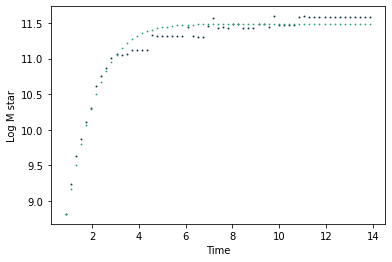

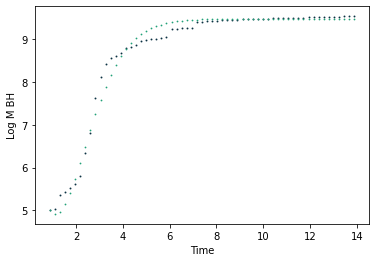

-------------------------------------------------------
 
 
--------- g3.26e13 ------------------------------------
m_*' = 0.656 m_* + -0.062 m_*^2 + 0.007 m_bh^2
m_bh' = 0.224 m_* + -0.006 m_*^2 + -0.018 m_bh^2


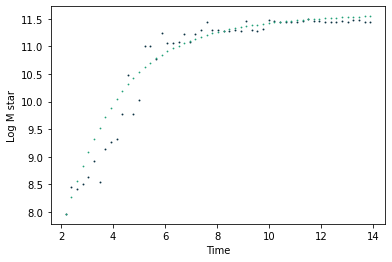

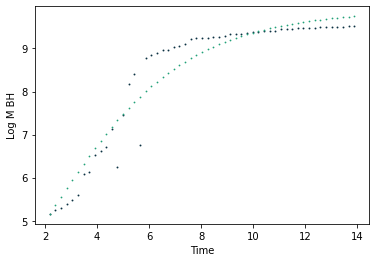

-------------------------------------------------------
 
 
--------- g6.57e12 ------------------------------------
m_*' = 0.886 m_* + -0.090 m_*^2 + 0.017 m_bh^2
m_bh' = 0.007 m_*^2 + -0.008 m_bh^2


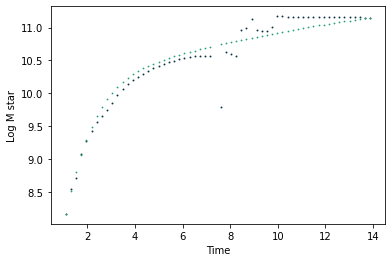

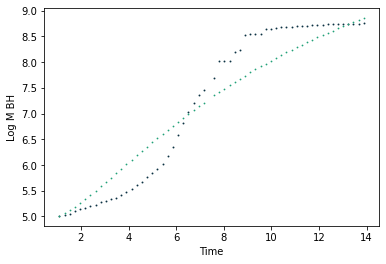

-------------------------------------------------------
 
 
--------- g6.86e12 ------------------------------------
m_*' = 0.135 m_* + -0.021 m_bh^2
m_bh' = -0.409 m_* + 0.057 m_*^2 + -0.031 m_bh^2


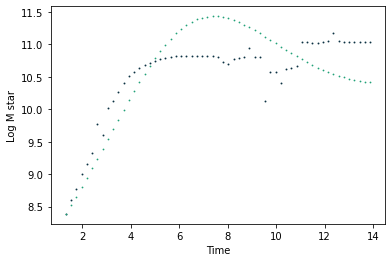

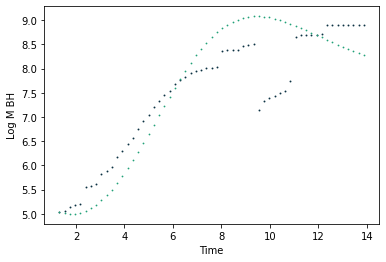

-------------------------------------------------------
 
 
--------- g3.42e12 ------------------------------------
m_*' = 1.086 m_* + -0.100 m_*^2
m_bh' = 0.011 m_*^2 + -0.018 m_bh^2


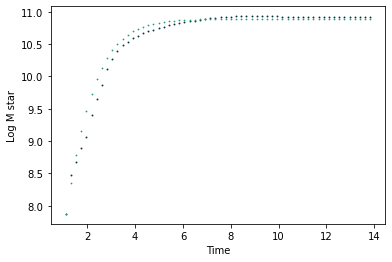

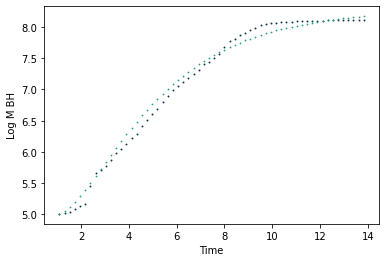

-------------------------------------------------------
 
 
--------- g2.58e13 ------------------------------------
m_*' = 2.129 m_* + -0.203 m_*^2 + 0.031 m_bh^2
m_bh' = 0.017 m_*^2 + -0.025 m_bh^2


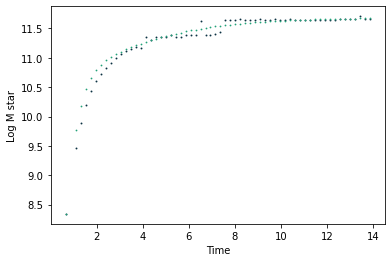

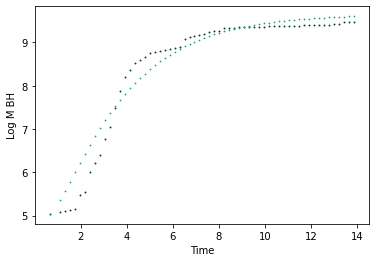

-------------------------------------------------------
 
 
--------- g3.78e13 ------------------------------------
m_*' = 0.964 m_* + -0.083 m_*^2 + -0.001 m_bh^2
m_bh' = -1.130 m_* + 0.149 m_*^2 + -0.078 m_bh^2


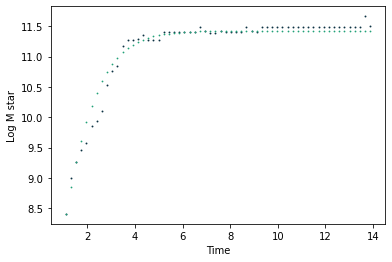

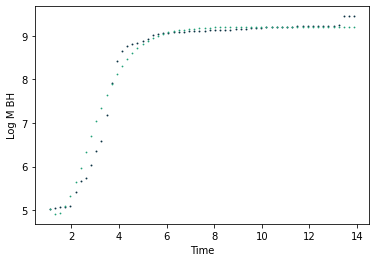

-------------------------------------------------------
 
 
--------- g3.89e13 ------------------------------------
m_*' = 1.882 m_* + -0.174 m_*^2 + 0.021 m_bh^2
m_bh' = -0.800 m_* + 0.104 m_*^2 + -0.052 m_bh^2


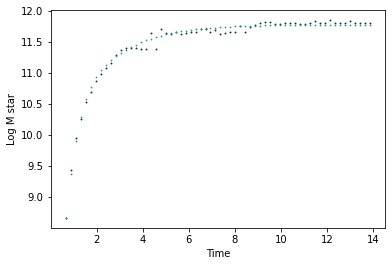

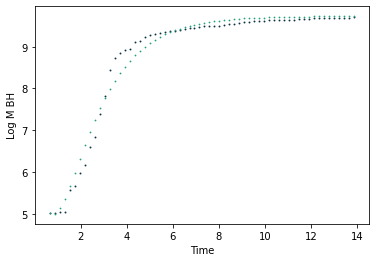

-------------------------------------------------------
 
 
--------- g2.10e13 ------------------------------------
m_*' = 0.015 m_*^2 + -0.023 m_bh^2
m_bh' = 0.027 m_*^2 + -0.040 m_bh^2


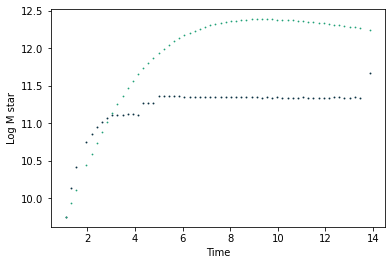

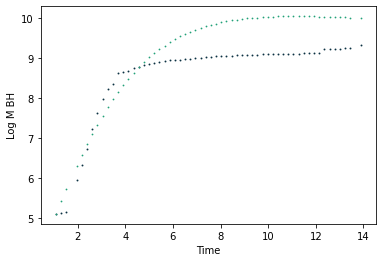

-------------------------------------------------------
 


In [122]:
lasso_optimizer = Lasso(alpha=0.05, max_iter=9999999, fit_intercept=False)
DataColor = "#0B3142" #black
SimulationColor = "#21A179" #green

def fitThisGalaxy(k, includeInt = False, degree = 2):
    t, mstar, mbh_c, color = readThisGalaxy(k)  
    X = np.transpose([np.log10(mstar), np.log10(mbh_c)]) #taking the logs here; maybe not a good idea
    model = ps.SINDy(feature_names=["m_*", "m_bh"], feature_library=ps.PolynomialLibrary(include_interaction=includeInt, degree=degree), optimizer=lasso_optimizer)
    theseAreNaNs = np.isnan(X[:,0]) | np.isnan(X[:,1])
    X = X[~theseAreNaNs,:]
    t = t[~theseAreNaNs]
    model.fit(X, t=t, unbias=True)
    return(t, X, model)


def fitAndOverplot(k, includeInt = False, degree = 2, graphicsOn = True):
    t, X, model = fitThisGalaxy(k, includeInt = includeInt, degree = degree)
    model.print()
    if(graphicsOn):
        s = model.simulate(X[0,:], t)
        plt.scatter(t, X[:,0], s=0.8, c=DataColor)
        plt.scatter(t, s[:,0], s=0.6, c=SimulationColor)
        plt.xlabel("Time")
        plt.ylabel("Log M star")    
        plt.show()
        plt.scatter(t, X[:,1], s=0.8, c=DataColor)
        plt.scatter(t, s[:,1], s=0.6, c=SimulationColor)
        plt.xlabel("Time")
        plt.ylabel("Log M BH") 
        plt.show()

for k in range(len(data_all[0].keys())):
    print(" ")
    try:
        fitAndOverplot(k)
    except:
        print("Galaxy " + str(list(all_galaxies)[k]) + " had NaNs or other issues in the data.")
    print("-------------------------------------------------------")
    print(" ")



##### It looks like there is a pretty good match in most cases. Before we get too excited though let's keep in mind that integrating a polynomial yields a polynomial, so this is not too far from a polynomial fit of the curves. What would make the difference is:
- ##### having the same expression with similar coefficients for all curves
- ##### having a physical interpretation

##### While I cannot say much on the second point (I guess you would expect stellar feedback and AGN feedback to reduce star formation, but what would be the exact dependence?), regarding the first point note that each galaxy was analyzed independently, yet most learned equations are in the form
- m_star' = a m_star - b m_star^2 - c m_bh^2
- m_bh' = d m_star^2 - e m_bh^2

##### i.e. the same 5 out of 10 possible coefficients are different from 0.

### Let's look at the equations without plots:

In [123]:
for k in range(len(data_all[0].keys())):
    print(" ")
    try:
        fitAndOverplot(k, graphicsOn=False)
    except:
        print("Galaxy " + str(list(all_galaxies)[k]) + " had NaNs or other issues in the data.")
    print("-------------------------------------------------------")
    print(" ")

 
--------- g7.55e11 ------------------------------------
m_*' = 0.873 m_* + -0.092 m_*^2 + 0.014 m_bh^2
m_bh' = 0.010 m_*^2 + -0.019 m_bh^2
-------------------------------------------------------
 
 
--------- g8.26e11 ------------------------------------
m_*' = 0.656 m_* + -0.059 m_*^2 + -0.007 m_bh^2
m_bh' = 0.013 m_*^2 + -0.023 m_bh^2
-------------------------------------------------------
 
 
--------- g1.12e12 ------------------------------------
m_*' = 0.473 m_* + -0.039 m_*^2 + -0.012 m_bh^2
m_bh' = 0.014 m_*^2 + -0.024 m_bh^2
-------------------------------------------------------
 
 
--------- g1.92e12 ------------------------------------
m_*' = 1.505 m_* + -0.137 m_*^2 + -0.007 m_bh^2
m_bh' = 0.023 m_*^2 + -0.037 m_bh^2
-------------------------------------------------------
 
 
--------- g2.79e12 ------------------------------------
m_*' = 1.076 m_* + -0.101 m_*^2 + 0.005 m_bh^2
m_bh' = 0.016 m_*^2 + -0.027 m_bh^2
-------------------------------------------------------
 
 


### Let us have a look at this system of equations in the phase plane

--------- g1.26e12 ------------------------------------
m_*' = 0.392 m_* + -0.039 m_*^2 + 0.002 m_bh^2
m_bh' = 0.005 m_*^2 + -0.008 m_bh^2


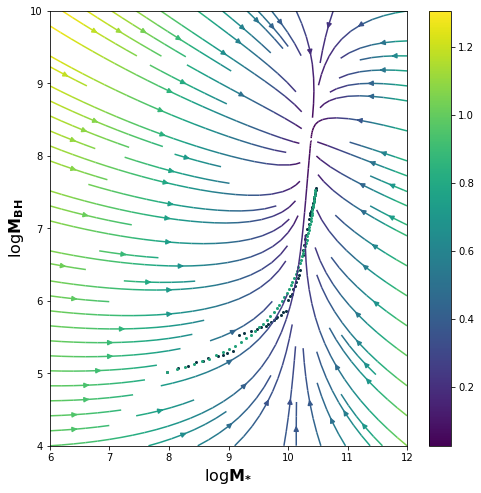

In [124]:
x, y = np.meshgrid(np.linspace(6, 12, 20),
                   np.linspace(4, 10, 20))

a, b, c, d, e = 0.392, 0.039, -0.002, 0.005, 0.008
u = a*x - b*x*x - c*y*y
v = d*x*x - e*y*y

plt.figure(figsize=(8, 8))
plt.xlim(6, 12)
plt.ylim(4, 10)
mag = norm(np.dstack([u, v]), axis=-1)
plt.streamplot(x, y, u, v, color=mag, cmap='viridis')
plt.colorbar()
plt.xlabel(r"$\mathbf{\log{M_{*}}}$", fontsize=16)
plt.ylabel(r"$\mathbf{\log{M_{BH}}}$", fontsize=16)

t, X, model = fitThisGalaxy(5)
model.print()
s = model.simulate(X[0,:], t)
plt.scatter(X[:,0], X[:,1], s=4.0, c=DataColor)
plt.scatter(s[:,0], s[:,1], s=4.0, c=SimulationColor)
plt.show()

The coefficients are taken from the equations learned for g1.26e12. The phase trajectory for g1.26e12 is shown (black points) superimposed and together with the relevant solution.